In [ ]:
#Aaman Bhandari

In [2]:
import pandas as pd

In [1]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

In [3]:
# Loading the "Auto MPG dataset" from the provided file
dataset_path = "auto-mpg.data"
dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

# Displaying the first few rows of the dataset
dataset.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
# Dropping rows with missing values for simplicity
dataset = dataset.dropna()

# Separating the target (MPG) and the feature (Horsepower) 
X = dataset['Horsepower'].values.reshape(-1, 1)  # Feature (reshaping for scikit-learn)
y = dataset['MPG'].values  # Target

# Normalizing the data
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1))

X_normalized[:5], y_normalized[:5]  # Displaying the first 5 normalized values for both feature and target


(array([[0.66413273],
        [1.57459447],
        [1.18439658],
        [1.18439658],
        [0.92426466]]),
 array([[-0.69863841],
        [-1.08349824],
        [-0.69863841],
        [-0.95521163],
        [-0.82692502]]))

In [6]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

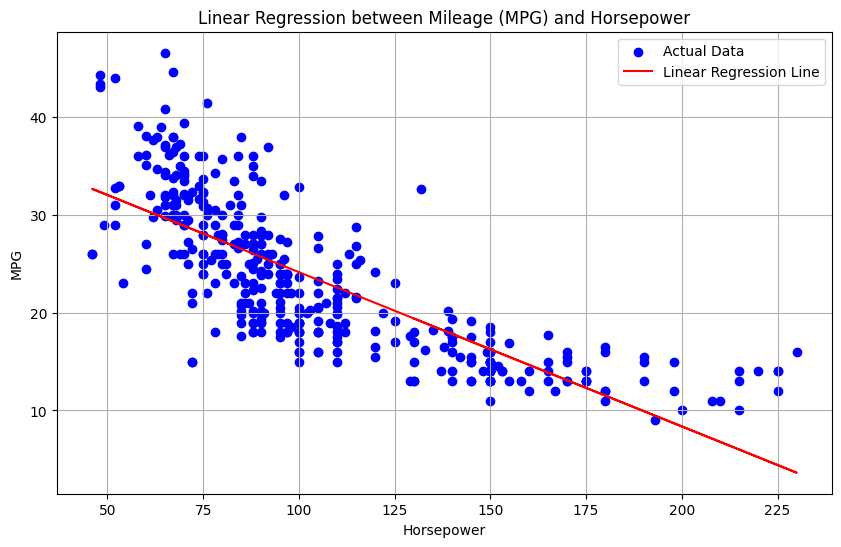

In [7]:
# Creating the linear regression model
regressor = LinearRegression()
regressor.fit(X_normalized, y_normalized)

# Predicting the MPG values using the trained linear regression model
y_pred_normalized = regressor.predict(X_normalized)

# Transforming the normalized predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_normalized)

# Plotting the data points and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Linear Regression Line')
plt.title('Linear Regression between Mileage (MPG) and Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()